In [26]:
import sys
sys.path.insert(0, "../../python")

import os
from ionization import ionization
from ionization import adk
from propagation import propagation
from propagation import laser
from lens import profile
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn

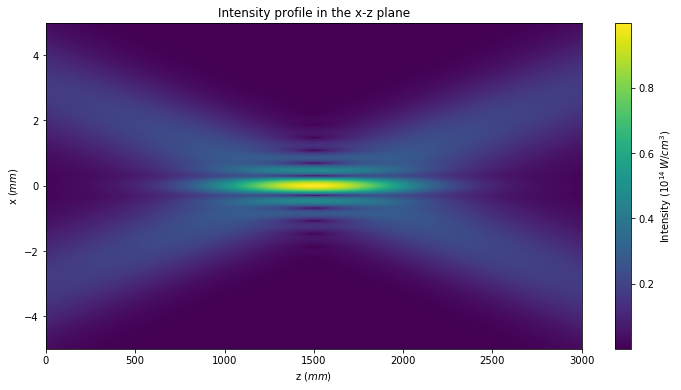

In [68]:
# The initial field on the z=0 plane is given by
A = 1.0
r0 = 300
beta = 2.4048 / r0
w0 = 1e3
lam = 0.8

def E(x, z):
    r = abs(np.reshape(x, (np.size(x), 1)))
    k = 2*np.pi/lam
    L = k*w0**2/2
    w = w0*np.sqrt(1 + (z/L)**2)
    phi = np.arctan(z/L)
    R = z + L**2/z
    U = A*w0/w \
        * np.exp(1j*((k-beta**2/2/k)*z-phi)) \
        * jn(0, beta*r/(1+1j*z/L)) \
        * np.exp((-1/w**2+1j*k/2/R)*(r**2+beta**2*z**2/k**2))
    return U

X = 10e3
Z = 3e6
x = np.linspace(-X/2, X/2, 2000, False)
z = np.linspace(-Z, Z, 1000)

plt.figure(figsize=(12,6))
plt.imshow((abs(E(x, z))**2)**(1/3), aspect='auto', extent=[0, Z/1e3, -X/2e3, X/2e3])
cb = plt.colorbar()
cb.set_label(r'Intensity ($10^{14}\,W/cm^3$)')
plt.set_cmap('viridis')
plt.xlabel(r'z ($mm$)')
plt.ylabel(r'x ($mm$)')
plt.title('Intensity profile in the x-z plane')
plt.show()